In [9]:
# import scipy.io.wavfile as wavfile
import librosa
import librosa.display
from scipy.signal import stft
from scipy import fft
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

## Frequency Spectrum
The frequency spectrum of an audio signal is the distribution of energy across different frequencies. It is obtained by applying the Fourier Transform to a time-domain audio signal. The frequency spectrum is useful for identifying the presence of certain frequencies in an audio signal, which can help in detecting musical notes, voice formants, or noise patterns.

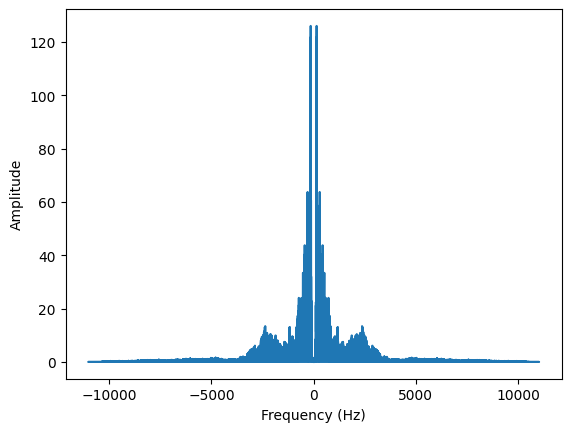

In [10]:

# Load audio file
# sample_rate, audio_data = wavfile.read("input/Nums_5dot1_24_48000.wav")
audio_data,sample_rate = librosa.load('input/Nums_5dot1_24_48000.wav')
# Apply Fourier transform to the audio signal
audio_spectrum = fft.fft(audio_data)

# Plot the frequency spectrum
freqs = fft.fftfreq(len(audio_spectrum)) * sample_rate
plt.plot(freqs, abs(audio_spectrum))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

## Spectogram
A spectrogram is a 2D visualization of the frequency spectrum of an audio signal over time. It shows how the energy of different frequencies changes over time. Spectrograms are useful for identifying changes in pitch or frequency over time, as well as for detecting noise patterns or other features in the audio signal.

In [11]:
# Define the window size and overlap
window_size = 1024
overlap = window_size // 2
# Compute the STFT using scipy.signal.stft
freqs, times, spec = stft(audio_data, fs=sample_rate, nperseg=window_size, noverlap=overlap)


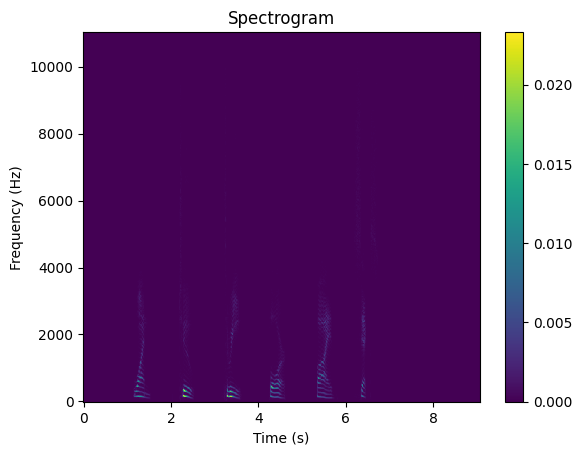

In [12]:
# Plot the spectrogram
plt.pcolormesh(times, freqs, np.abs(spec), cmap='viridis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar()
plt.show()


c:\Users\jordan.angulo\.conda\envs\sound_processing\lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


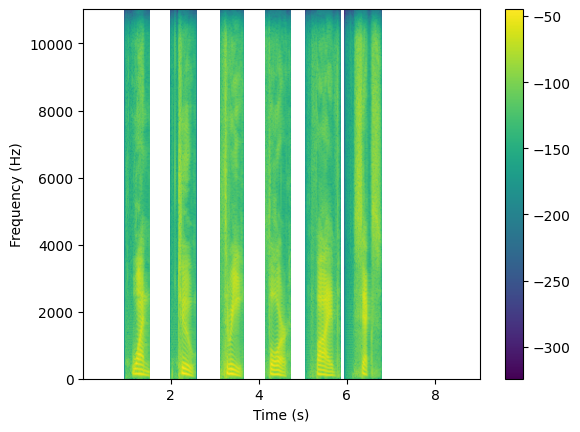

In [13]:
# Load audio file

# Calculate the spectrogram of the audio signal
nperseg = 1024
noverlap = int(nperseg / 2)
spec,frequencies, times, spectrogram = plt.specgram(audio_data, NFFT=nperseg, noverlap=noverlap, Fs=sample_rate, cmap='viridis')

# Plot the spectrogram
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar()
plt.show()


## Mel Spectrogram

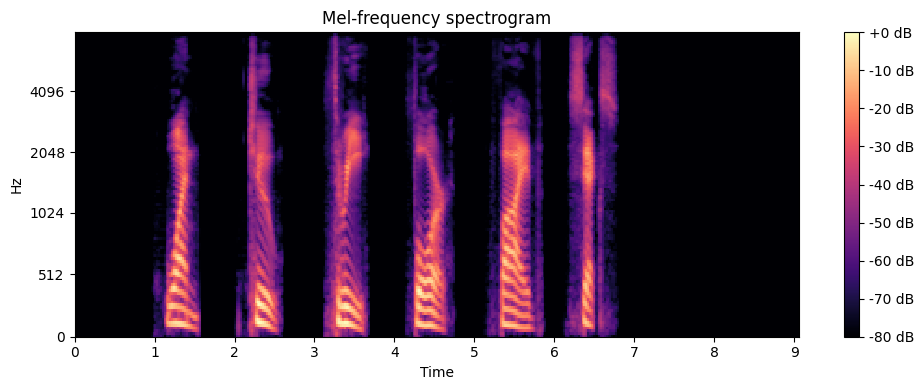

In [14]:
# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_mels=128)

# Convert to decibels
S_dB = librosa.power_to_db(S, ref=np.max)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sample_rate, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


## MFCC
Mel-Frequency Cepstral Coefficients (MFCCs) are a set of features that are commonly used in speech recognition and music analysis. They are derived by applying a series of transformations to the spectrogram of an audio signal. MFCCs are useful for identifying patterns in the spectral content of an audio signal that are relevant to human perception.

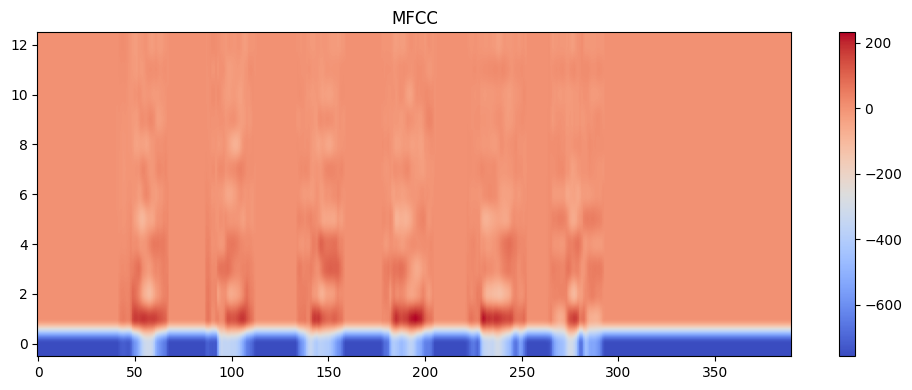

In [19]:
import librosa
import matplotlib.pyplot as plt

# Calculate the MFCCs of the audio signal
n_mfcc = 13
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [16]:
## Inverse Fourier

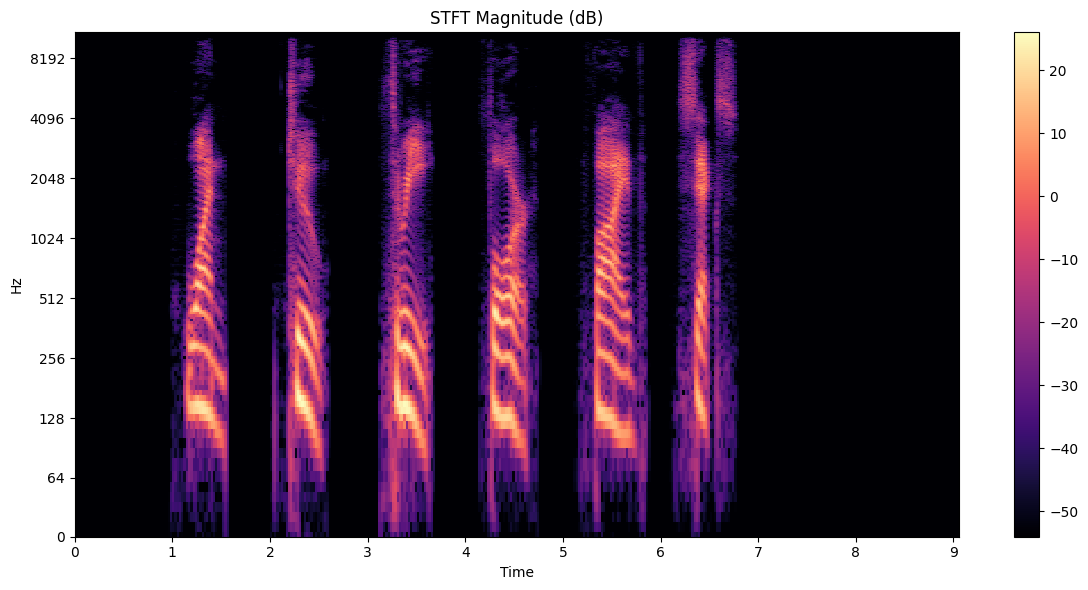

In [17]:

# Apply STFT
n_fft = 2048
hop_length = 512
stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)

# Get the magnitude and phase of the STFT
magnitude = librosa.magphase(stft)[0]
phase = librosa.magphase(stft)[1]

# Optional: Convert magnitude to decibels (dB)
magnitude_db = librosa.amplitude_to_db(magnitude)

# Optional: Visualize the STFT
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
librosa.display.specshow(magnitude_db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('STFT Magnitude (dB)')
plt.tight_layout()
plt.show()


In [18]:
# Inverse STFT
istft = magnitude * phase
y_hat = librosa.istft(istft, hop_length=hop_length)

# Save the recreated audio file
sf.write('a.wav',y_hat,sample_rate)